In [946]:
## Import the packages
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [947]:
#code for importing the loan.cdv file here
loan_data = pd.read_csv("loan.csv")

In [948]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [949]:
#loan data info
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


In [950]:
# code for column-wise null count here
loan_data.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [951]:
# percentage of null in each column
round(loan_data.isnull().sum()/len(loan_data.index), 2)*100

id                                  0.0
member_id                           0.0
loan_amnt                           0.0
funded_amnt                         0.0
funded_amnt_inv                     0.0
term                                0.0
int_rate                            0.0
installment                         0.0
grade                               0.0
sub_grade                           0.0
emp_title                           6.0
emp_length                          3.0
home_ownership                      0.0
annual_inc                          0.0
verification_status                 0.0
issue_d                             0.0
loan_status                         0.0
pymnt_plan                          0.0
url                                 0.0
desc                               33.0
purpose                             0.0
title                               0.0
zip_code                            0.0
addr_state                          0.0
dti                                 0.0


In [952]:
#creating null_data df to take the columns names which have complete null values
null_data=loan_data.columns[100*(loan_data.isnull().sum()/len(loan_data.index)) == 100]
print(null_data)

Index(['mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'num_tl_op_past_12m',
       'pct_tl_nvr_dl

In [953]:
#Dropping the columns where all 39717 rows are null

loan_data = loan_data.drop(null_data, axis=1)

In [954]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,Jun-16,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


In [955]:
loan_data.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

In [956]:
#dropping next payment date
loan_data.drop(['next_pymnt_d'],axis=1,inplace=True)
loan_data.drop(['desc'],axis=1,inplace=True)

In [957]:
round(loan_data.isnull().sum()/len(loan_data.index), 2)*100

id                             0.0
member_id                      0.0
loan_amnt                      0.0
funded_amnt                    0.0
funded_amnt_inv                0.0
term                           0.0
int_rate                       0.0
installment                    0.0
grade                          0.0
sub_grade                      0.0
emp_title                      6.0
emp_length                     3.0
home_ownership                 0.0
annual_inc                     0.0
verification_status            0.0
issue_d                        0.0
loan_status                    0.0
pymnt_plan                     0.0
url                            0.0
purpose                        0.0
title                          0.0
zip_code                       0.0
addr_state                     0.0
dti                            0.0
delinq_2yrs                    0.0
earliest_cr_line               0.0
inq_last_6mths                 0.0
mths_since_last_delinq        65.0
mths_since_last_reco

In [958]:
print(loan_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 55 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [959]:
#dropping addr_state,zip_code,URL,emp_title,title as we wont be using this for analysis 
loan_data.drop(['emp_title','zip_code','addr_state','title', 'url'],axis=1,inplace=True)

In [960]:
#checking for duplicates in loan data
loan_data['member_id'].nunique()

39717

In [961]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,171.62,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,119.66,Sep-13,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,649.91,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,357.48,Apr-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,67.79,May-16,0.0,1,INDIVIDUAL,0,0.0,0,0.0,0.0


**Preparing the Data**

In [968]:
#creating the loan_driving_data data frame with driver variables
driving_data=loan_data[['id','member_id','funded_amnt','term','int_rate','installment','grade',
                             'emp_length','home_ownership','annual_inc','verification_status','issue_d','loan_status','purpose',
                             'dti','revol_util']]

loan_driving_data=pd.DataFrame(driving_data)

In [969]:
print(loan_driving_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 16 columns):
id                     39717 non-null int64
member_id              39717 non-null int64
funded_amnt            39717 non-null int64
term                   39717 non-null object
int_rate               39717 non-null object
installment            39717 non-null float64
grade                  39717 non-null object
emp_length             38642 non-null object
home_ownership         39717 non-null object
annual_inc             39717 non-null float64
verification_status    39717 non-null object
issue_d                39717 non-null object
loan_status            39717 non-null object
purpose                39717 non-null object
dti                    39717 non-null float64
revol_util             39667 non-null object
dtypes: float64(3), int64(3), object(10)
memory usage: 4.8+ MB
None


In [970]:
#Removing the percentage symbol from interest rate and making as a float value
loan_driving_data['int_rate'] = loan_driving_data['int_rate'].apply(lambda x: pd.to_numeric(x.split("%")[0]))

In [971]:
loan_driving_data.head()

,id,member_id,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,revol_util
0,1077501,1296599,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,83.70%
1,1077430,1314167,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,9.40%
2,1077175,1313524,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,98.50%
3,1076863,1277178,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,21%
4,1075358,1311748,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,53.90%


In [972]:
#Removing the percentage symbol from revol util and making as a float value
loan_driving_data['revol_util'] = loan_driving_data['revol_util'].str.split("%",1).str[0]
loan_driving_data['revol_util'] = pd.to_numeric(loan_driving_data['revol_util'])

In [973]:
#checking for the null values
loan_driving_data.loc[loan_driving_data["revol_util"].isnull()]

,id,member_id,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,revol_util
3565,1016416,1244120,8000,36 months,19.42,294.95,E,3 years,RENT,30000.0,Source Verified,Nov-11,Fully Paid,debt_consolidation,18.56,NaN
4714,997734,1222858,6100,36 months,14.27,209.29,C,NaN,MORTGAGE,23748.0,Verified,Nov-11,Charged Off,home_improvement,23.95,NaN
4943,790093,994164,7200,36 months,14.27,247.03,C,7 years,RENT,48000.0,Not Verified,Oct-11,Fully Paid,debt_consolidation,15.28,NaN
11282,817195,1024992,5000,36 months,21.36,189.31,F,NaN,MORTGAGE,35000.0,Not Verified,Jul-11,Fully Paid,home_improvement,21.91,NaN
12042,804073,1009899,3000,60 months,22.11,83.05,G,6 years,OWN,17652.0,Source Verified,Jul-11,Charged Off,other,0.00,NaN
12147,802201,1007832,4275,36 months,15.99,150.28,D,7 years,MORTGAGE,54500.0,Not Verified,Jul-11,Fully Paid,home_improvement,7.49,NaN
13891,772732,974723,2000,36 months,18.39,72.70,E,1 year,RENT,24000.0,Not Verified,Jun-11,Charged Off,other,22.60,NaN
17985,706991,899283,20000,60 months,20.48,535.24,G,10+ years,RENT,42000.0,Verified,Mar-11,Charged Off,debt_consolidation,18.91,NaN
18184,702880,894759,1825,36 months,12.68,61.22,C,< 1 year,RENT,19200.0,Not Verified,Mar-11,Fully Paid,major_purchase,16.81,NaN
21604,641703,821414,2500,36 months,16.69,88.75,E,7 years,RENT,27024.0,Verified,Dec-10,Fully Paid,debt_consolidation,5.24,NaN


In [974]:
#dropping the records which have revol_util as null 
loan_driving_data = loan_driving_data.dropna(subset=['revol_util']) 

In [976]:
#checking for emp_lengths
loan_driving_data['emp_length'].value_counts()

10+ years    8878
< 1 year     4571
2 years      4383
3 years      4091
4 years      3429
5 years      3278
1 year       3234
6 years      2226
7 years      1770
8 years      1477
9 years      1258
Name: emp_length, dtype: int64

In [977]:
#as we see maximum ppl have 10+ years emp length.. Updating NA to 10+ years years.  
loan_driving_data.loc[loan_driving_data["emp_length"].isnull()]
loan_driving_data.loc[pd.isnull(loan_driving_data['emp_length']), ['emp_length']] = '10+ years'

In [978]:
loan_driving_data['emp_length'].value_counts()

10+ years    9950
< 1 year     4571
2 years      4383
3 years      4091
4 years      3429
5 years      3278
1 year       3234
6 years      2226
7 years      1770
8 years      1477
9 years      1258
Name: emp_length, dtype: int64

In [979]:
#Creating a bins based on emp_length
# employee with 1 to 4 experience as junior
# employee with 5 to 8 experience as Mid Level
# employee with 9 and 10+ experience as Senior

loan_driving_data['emp_length_grp']=loan_driving_data['emp_length']
loan_driving_data.loc[loan_driving_data['emp_length'].str.contains("1 year") ,['emp_length_grp']] ='Junior'
loan_driving_data.loc[loan_driving_data['emp_length'].str.contains("2 years"), ['emp_length_grp']] ='Junior'
loan_driving_data.loc[loan_driving_data['emp_length'].str.contains("3 years"), ['emp_length_grp']] ='Junior'
loan_driving_data.loc[loan_driving_data['emp_length'].str.contains("4 years"), ['emp_length_grp']] ='Junior'
loan_driving_data.loc[loan_driving_data['emp_length'].str.contains("5 years"), ['emp_length_grp']] ='Mid-Level'
loan_driving_data.loc[loan_driving_data['emp_length'].str.contains("6 years"), ['emp_length_grp']] ='Mid-Level'
loan_driving_data.loc[loan_driving_data['emp_length'].str.contains("7 years"), ['emp_length_grp']] ='Mid-Level'
loan_driving_data.loc[loan_driving_data['emp_length'].str.contains("8 years"), ['emp_length_grp']] ='Mid-Level'
loan_driving_data.loc[loan_driving_data['emp_length'].str.contains("9 years"), ['emp_length_grp']] ='Senior'
loan_driving_data.loc[loan_driving_data['emp_length'].str.contains("10"), ['emp_length_grp']] ='Senior'

In [980]:
loan_driving_data['emp_length_grp'].unique()

array(['Senior', 'Junior', 'Mid-Level'], dtype=object)

In [982]:
loan_driving_data.head()

,id,member_id,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,revol_util,emp_length_grp
0,1077501,1296599,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,83.7,Senior
1,1077430,1314167,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,9.4,Junior
2,1077175,1313524,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,98.5,Senior
3,1076863,1277178,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,21.0,Senior
4,1075358,1311748,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,53.9,Junior


In [983]:
#putting funding amount in to bins
#funding amount <= 5000 as low
#funding amount > 5000 and <= 15000 as Medium
#funding amount > 15000 and <= 25000 as High
#funding amount > 25000 Very High

loan_driving_data['funded_amnt_grp'] = loan_driving_data['funded_amnt']

loan_driving_data.loc[loan_driving_data['funded_amnt']<=5000, ['funded_amnt_grp']] = 'Low'
loan_driving_data.loc[((loan_driving_data['funded_amnt']>5000) & (loan_driving_data['funded_amnt']<=15000)), ['funded_amnt_grp']] = 'Medium'
loan_driving_data.loc[((loan_driving_data['funded_amnt']>15000) & (loan_driving_data['funded_amnt']<=25000)), ['funded_amnt_grp']] = 'High'
loan_driving_data.loc[loan_driving_data['funded_amnt']>25000, ['funded_amnt_grp']] = 'Very High'

In [984]:
loan_driving_data['funded_amnt_grp'].value_counts()

Medium       21324
Low           9617
High          7315
Very High     1411
Name: funded_amnt_grp, dtype: int64

In [985]:
#putting interest rate in to bins
#interest rate <=10 as low
#interest rate >10 and <=15 as medium
#interest rate >15 as High

loan_driving_data['int_rate_grp'] = loan_driving_data['int_rate']

loan_driving_data.loc[loan_driving_data['int_rate']<=10, ['int_rate_grp']] = 'Low'
loan_driving_data.loc[((loan_driving_data['int_rate']>10) & (loan_driving_data['int_rate']<=15)), ['int_rate_grp']] = 'Medium'
loan_driving_data.loc[loan_driving_data['int_rate']>15, ['int_rate_grp']] = 'High'

In [986]:
loan_driving_data.head()

,id,member_id,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,revol_util,emp_length_grp,funded_amnt_grp,int_rate_grp
0,1077501,1296599,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,83.7,Senior,Low,Medium
1,1077430,1314167,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,9.4,Junior,Low,High
2,1077175,1313524,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,98.5,Senior,Low,High
3,1076863,1277178,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,21.0,Senior,Medium,Medium
4,1075358,1311748,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,53.9,Junior,Low,Medium


In [987]:
#putting installments in to bins
#installment <= 200 as low
#installment >200 and <=400 as Medium 
#installment >400 and <=600 as High 
#installment >600 as Very High

loan_driving_data['installment_grp'] = loan_driving_data['installment']

loan_driving_data.loc[loan_driving_data['installment']<=200, ['installment_grp']] = 'Low'
loan_driving_data.loc[((loan_driving_data['installment']>200) & (loan_driving_data['installment']<=400)), ['installment_grp']] = 'Medium'
loan_driving_data.loc[((loan_driving_data['installment']>400) & (loan_driving_data['installment']<=600)), ['installment_grp']] = 'High'
loan_driving_data.loc[loan_driving_data['installment']>600, ['installment_grp']] = 'Very High'

In [988]:
loan_driving_data.head()

,id,member_id,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,purpose,dti,revol_util,emp_length_grp,funded_amnt_grp,int_rate_grp,installment_grp
0,1077501,1296599,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,credit_card,27.65,83.7,Senior,Low,Medium,Low
1,1077430,1314167,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,car,1.00,9.4,Junior,Low,High,Low
2,1077175,1313524,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,small_business,8.72,98.5,Senior,Low,High,Low
3,1076863,1277178,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,other,20.00,21.0,Senior,Medium,Medium,Medium
4,1075358,1311748,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,Source Verified,Dec-11,Current,other,17.94,53.9,Junior,Low,Medium,Low


In [989]:
#putting annual income in to bins
#Annual income <= 50000 as Low
#Annual income >50000 and <=100000 as medium
#Annual income >100000 and <=150000 as High
#Annual income >150000 as very high

loan_driving_data['annual_income_grp'] = loan_driving_data['annual_inc']

loan_driving_data.loc[loan_driving_data['annual_inc']<=50000, ['annual_income_grp']] = 'Low'
loan_driving_data.loc[((loan_driving_data['annual_inc']>50000) & (loan_driving_data['annual_inc']<=100000)), ['annual_income_grp']] = 'Medium'
loan_driving_data.loc[((loan_driving_data['annual_inc']>100000) & (loan_driving_data['annual_inc']<=150000)), ['annual_income_grp']] = 'High'
loan_driving_data.loc[loan_driving_data['annual_inc']>150000, ['annual_income_grp']] = 'Very High'

In [990]:
loan_driving_data['annual_income_grp'].value_counts()

Medium       18281
Low          15702
High          4134
Very High     1550
Name: annual_income_grp, dtype: int64

In [991]:
#converting issue date to correct format 
from datetime import datetime
loan_driving_data['issue_d'] = loan_driving_data['issue_d'].apply(lambda x: datetime.strptime(x, '%b-%y'))
# extracting month and year from issue_date
loan_driving_data['issue_month'] = loan_driving_data['issue_d'].apply(lambda x: x.month)
loan_driving_data['issue_year'] = loan_driving_data['issue_d'].apply(lambda x: x.year)

In [992]:
loan_driving_data.head()

,id,member_id,funded_amnt,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,...,purpose,dti,revol_util,emp_length_grp,funded_amnt_grp,int_rate_grp,installment_grp,annual_income_grp,issue_month,issue_year
0,1077501,1296599,5000,36 months,10.65,162.87,B,10+ years,RENT,24000.0,...,credit_card,27.65,83.7,Senior,Low,Medium,Low,Low,12,2011
1,1077430,1314167,2500,60 months,15.27,59.83,C,< 1 year,RENT,30000.0,...,car,1.00,9.4,Junior,Low,High,Low,Low,12,2011
2,1077175,1313524,2400,36 months,15.96,84.33,C,10+ years,RENT,12252.0,...,small_business,8.72,98.5,Senior,Low,High,Low,Low,12,2011
3,1076863,1277178,10000,36 months,13.49,339.31,C,10+ years,RENT,49200.0,...,other,20.00,21.0,Senior,Medium,Medium,Medium,Low,12,2011
4,1075358,1311748,3000,60 months,12.69,67.79,B,1 year,RENT,80000.0,...,other,17.94,53.9,Junior,Low,Medium,Low,Medium,12,2011


In [993]:
loan_driving_data['loan_status'].value_counts()

Fully Paid     32916
Charged Off     5611
Current         1140
Name: loan_status, dtype: int64

In [994]:
#As we are mainly need to focus on the default people we can ignore, fully paid people as they are no risky people,
#current status people neither fully paid or defaulted so these can be ignored. We mainly focus on charged off people
#Hence Charged off people given the value 1 rest of the both as 0.
loan_driving_data['loan_status_grp'] = loan_driving_data['loan_status']

loan_driving_data.loc[loan_driving_data['loan_status']=='Charged Off', ['loan_status_grp']] = 1
loan_driving_data.loc[((loan_driving_data['loan_status']=='Fully Paid') | (loan_driving_data['loan_status']=='Current')),['loan_status_grp']] = 0

In [995]:
loan_driving_data['loan_status_grp'].value_counts()

0    34056
1     5611
Name: loan_status_grp, dtype: int64

In [997]:
#Taking the charge off data in to seperate data frame loan_data_sample
loan_data_sample = loan_driving_data.loc[loan_driving_data['loan_status']=='Charged Off']

In [998]:
loan_driving_data.to_csv("loan_driving_data.csv")

**UNIVARIATE ANALYSIS**

In [999]:
#Percentage of default people
round(loan_driving_data.loan_status_grp.sum()/len(loan_driving_data.loan_status_grp), 2)*100

14.000000000000002

*The overall default people Percentage is about 14%.*

**visualisation of the default percent vs categorical variables**   

**UNIVARIATE ANALYSIS**

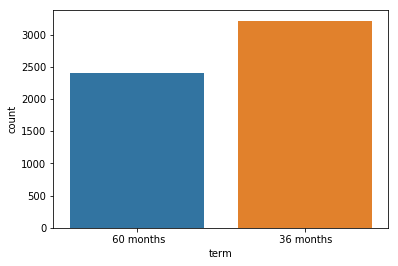

In [1000]:
# plotting default status across term of the loan
sns.countplot(loan_data_sample['term'])
plt.show()

Its clearly seen that the people whose term is 60 months are defaulted more

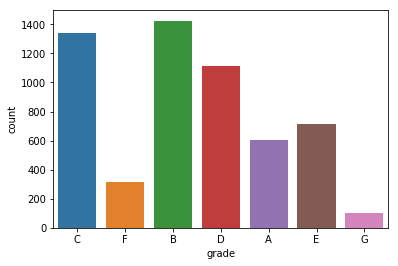

In [1001]:
# plotting default status across grade of the loan
sns.countplot(loan_data_sample['grade'])
plt.show()

Borrowers with Grade B are more likely to default followed by grade C.

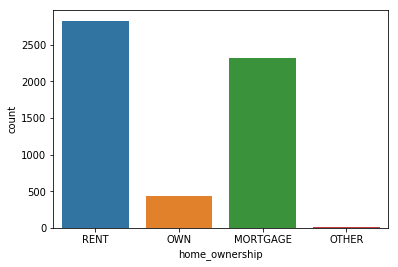

In [1002]:
#count plot for home_owner_ship
sns.countplot(loan_data_sample['home_ownership'])
plt.show()

Borrowers living in RENT home ownership are more likely to default

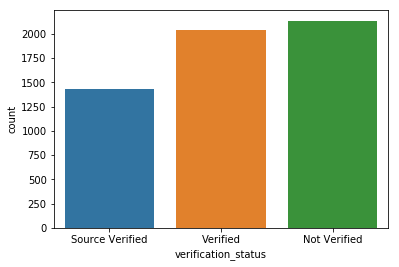

In [1003]:
#count plot for verification_status
sns.countplot(loan_data_sample['verification_status'])
plt.show()

Borrowers with not verified status are most likely to default. consumer finance company have to be more careful with verification and background checks before lending the loan amount.

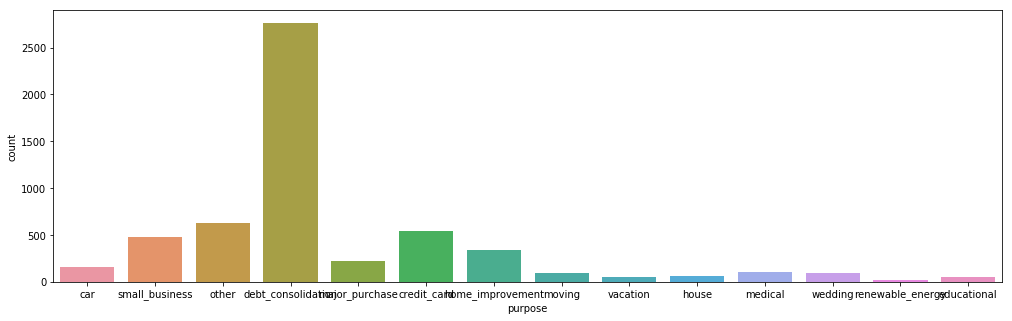

In [1005]:
#count plot for purpose
plt.figure(figsize=(17, 5))
sns.countplot(loan_data_sample['purpose'])
plt.show()

Borrowers are most likely to default when the purpose of loan is debt consolidation.

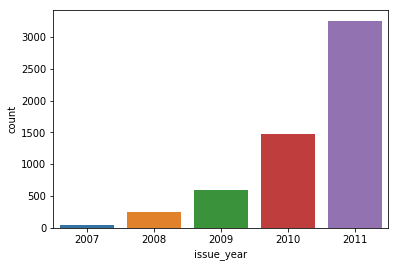

In [1006]:
# let's see the distribution of loans across years
sns.countplot(loan_data_sample['issue_year'])
plt.show()

We can see that number of loans has increased across years.

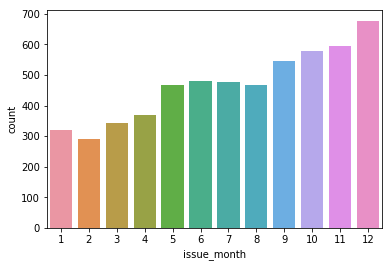

In [1007]:
#Count plot for issue month
sns.countplot(loan_data_sample['issue_month'])
plt.show()

We can see that most of the loans are given in the month of december and maximum of the loans in 2nd half of the year

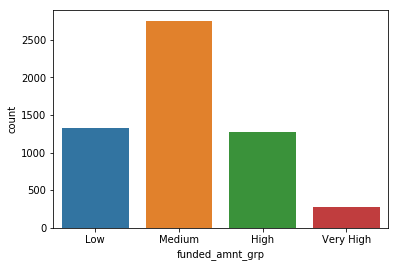

In [1008]:
#count plot for funded_amnt_grp
sns.countplot(loan_data_sample['funded_amnt_grp'])
plt.show()

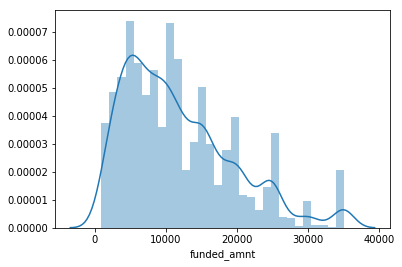

In [1009]:
#distribution plot for histogram
sns.distplot(loan_data_sample['funded_amnt'])
plt.show()

From both the above graphs - bar and distribution plot, we can conclude that borrowers are most likely default when the fund amount group is in medium sector i.e 5000 - 10k USD, followed by lower sector.

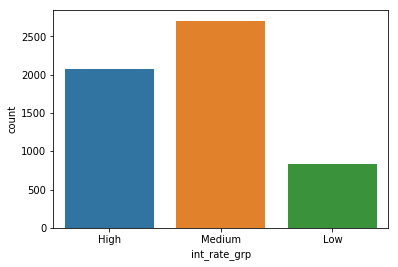

In [1010]:
#count plot for interest rate group
sns.countplot(loan_data_sample['int_rate_grp'])
plt.show()

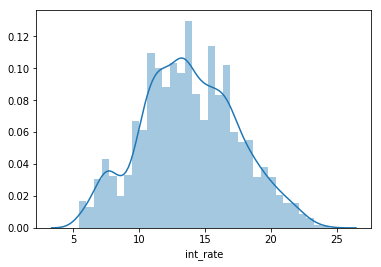

In [1011]:
#distribution plot for interst rate
sns.distplot(loan_data_sample['int_rate'])
plt.show()

From both the above graphs - bar and distribution plot, we can conclude that borrowers are most likely default when the rate of interest is between 10-15%.

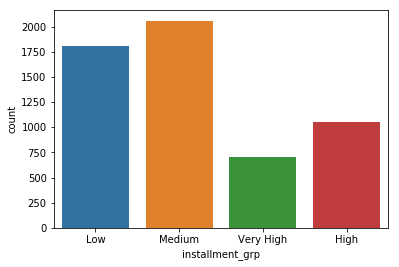

In [1012]:
# count plot for installments groups
sns.countplot(loan_data_sample['installment_grp'])
plt.show()

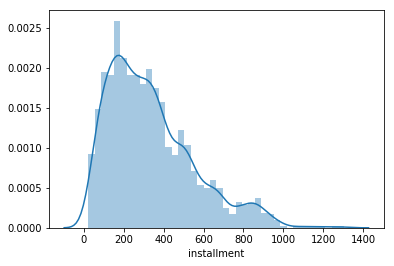

In [1013]:
#distribution plot for installment
sns.distplot(loan_data_sample['installment'])
plt.show()

From both the above graphs - bar and distribution plot, we can conclude that borrowers are most likely default when the installment is between 200-400k USD and with lesser than 200k USD.

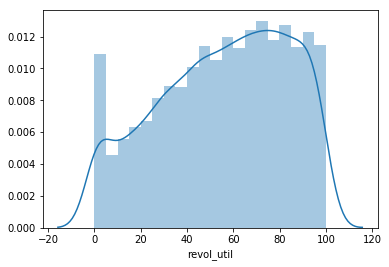

In [1014]:
#distribution plot for revol utilasation 
sns.distplot(loan_data_sample['revol_util'])
plt.show()

Borrowers with higher revolving utilisation are most likely to default.

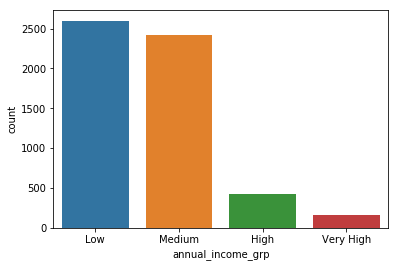

In [1015]:
#count plot for annual income group
sns.countplot(loan_data_sample['annual_income_grp'])
plt.show()

Borrowers with lower income group i.e less than 50000 USD are most likely to default

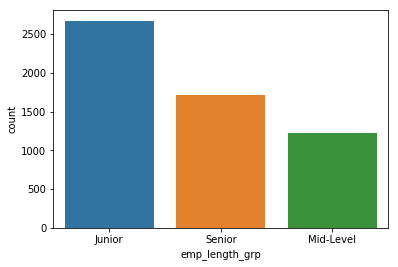

In [1016]:
#count plot for emp_length group
sns.countplot(loan_data_sample['emp_length_grp'])
plt.show()

Borrowers with junior employment length group are most likely to default as they fall under lower annual income group

**Segmented Univariate Analysis**

In [1017]:
#defining and assigning a new dataframe 'loan_main_purpose'
loan_main_purpose = loan_driving_data

In [1018]:
# filtering the df for the 4 types of loans mentioned above
filter_purposes = ["credit_card","debt_consolidation","home_improvement","major_purchase","small_business"]
loan_main_purpose = loan_main_purpose[loan_main_purpose['purpose'].isin(filter_purposes)]
loan_main_purpose['purpose'].value_counts()

debt_consolidation    18629
credit_card            5128
home_improvement       2971
major_purchase         2181
small_business         1827
Name: purpose, dtype: int64

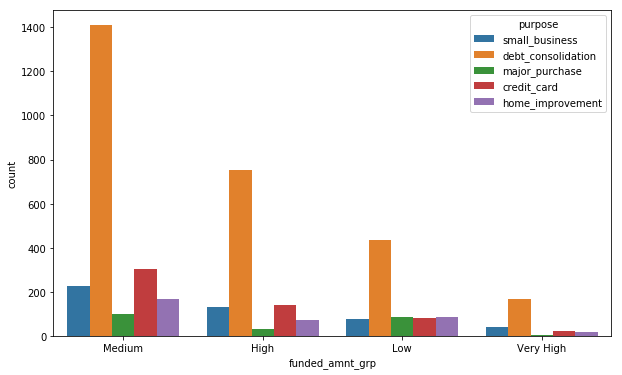

In [1019]:
#count plot for funded amount for every purpose 

loan_main_purpose = loan_data_sample[loan_data_sample['purpose'].isin(filter_purposes)]

plt.figure(figsize=[10, 6])
sns.countplot(x="funded_amnt_grp",hue="purpose", data=loan_main_purpose)
plt.show()

Borrowers are most likely to default when the amount funded is medium and their purpose is debt consolidation.

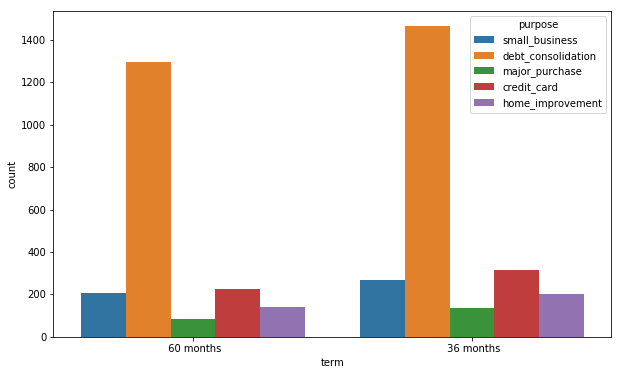

In [1020]:
#count plot for term for every purpose
plt.figure(figsize=[10, 6])
sns.countplot(x="term",hue="purpose", data=loan_main_purpose)
plt.show()

Borrowers are most likely to default when the tenure is shorter and the purpose is debt consolidation

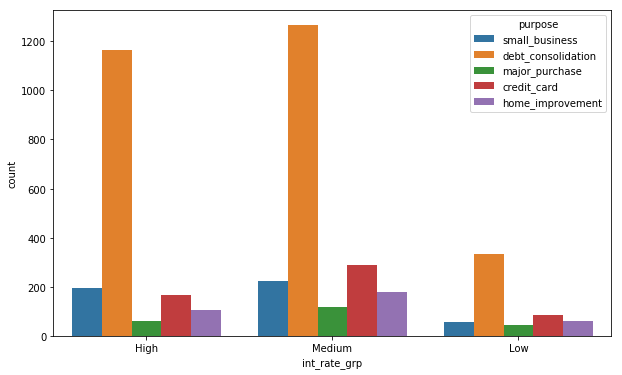

In [1021]:
#plot showing variation in Interest rates for various purposes.
plt.figure(figsize=[10, 6])
sns.countplot(x="int_rate_grp",hue="purpose", data=loan_main_purpose)
plt.show()

Plot revelas that interset rate is highest for debt consolidation purpose among all brackets of interest rates namely low,medium and high . 

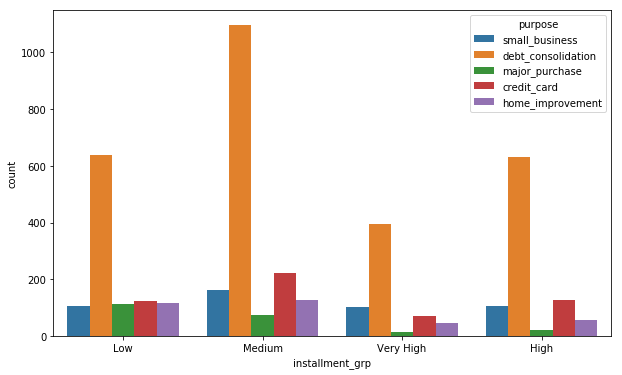

In [1022]:
#Plot showing variation in installment group across various purposes
plt.figure(figsize=[10, 6])
sns.countplot(x="installment_grp",hue="purpose", data=loan_main_purpose)
plt.show()

Plot shows that as chances of likely default is maximum for medium installment group.

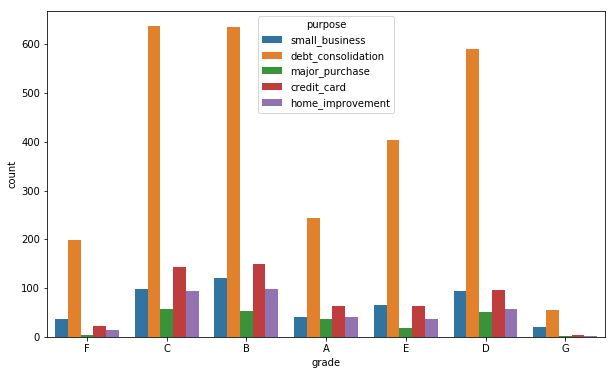

In [1023]:
#plot for variation in grade across various purposes.
plt.figure(figsize=[10, 6])
sns.countplot(x="grade",hue="purpose", data=loan_main_purpose)
plt.show()

As the grade detoriates the chance of likely default increase. Though the variation in default varies across various purposes, the number of defaults increase as grade changes.

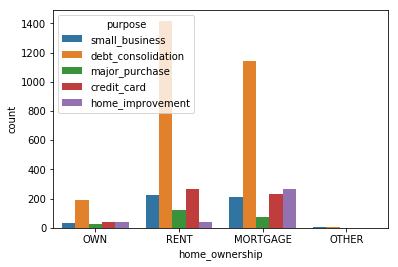

In [1024]:
# Plot showing variation in home/asseet ownership when lending is for various purposes. 
sns.countplot(x="home_ownership",hue="purpose", data=loan_main_purpose)
plt.show()

Plot indicates that Rented borrowers are more likely to default in case of repayment compared to others.Among the purposes lent debt consolidation is more likely case for default. 

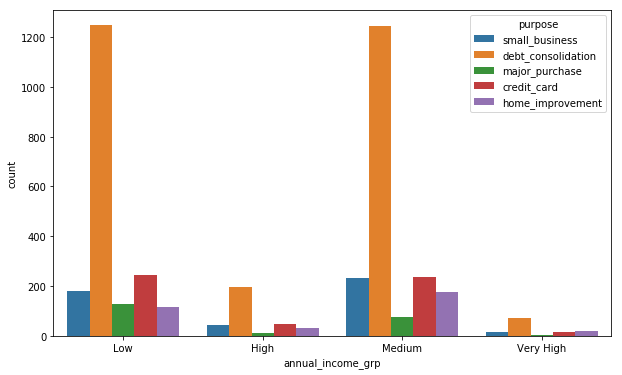

In [1025]:
#count plot for annual income
plt.figure(figsize=[10, 6])
sns.countplot(x="annual_income_grp",hue="purpose", data=loan_main_purpose)
plt.show()

Borrowers are most likely to default when the debt consolidation is high and annual income group is for low and medium sectors

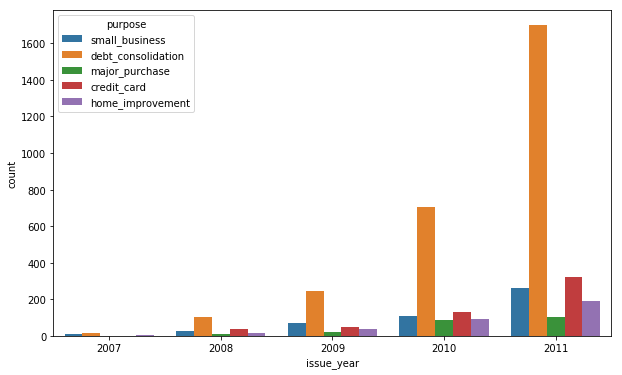

In [1026]:
#count plot for issue year for each purpose
plt.figure(figsize=[10, 6])
sns.countplot(x="issue_year",hue="purpose", data=loan_main_purpose)
plt.show()

Borrowers from issue year 2011 have defaulted the highest who had borrowed the loan with a purpose of debt consolidation

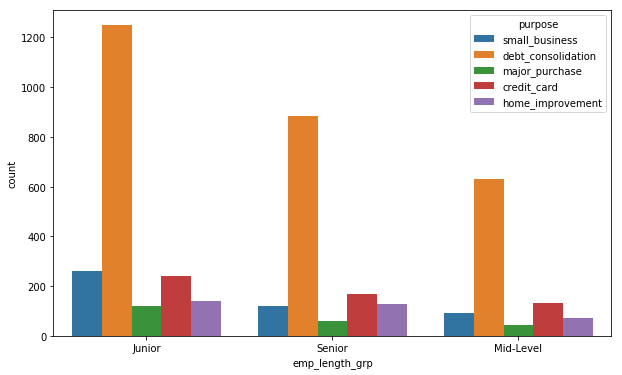

In [1027]:
#count plot for employement length group for each purpose
plt.figure(figsize=[10, 6])
sns.countplot(x="emp_length_grp",hue="purpose", data=loan_main_purpose)
plt.show()

Borrower with junior level of employment are most likely to default when the purpose of loan taken is debt consolidation.

### BIVARIATE ANALYSIS

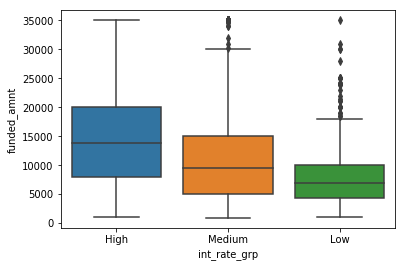

In [1028]:
#Box plot between interest rate group and funded amount

sns.boxplot(x='int_rate_grp',y='funded_amnt',data=loan_data_sample)
plt.show()

We observe more outliers in lower rate of interest bracket. Bank should avoid lending higher funded amount with lower interest rate as this would lead to significant business loss.

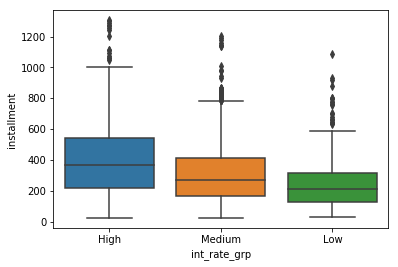

In [1029]:
#Box plot between interest rate group and installment

#Outliers have been identified in this plot which can be ignored. 

sns.boxplot(x='int_rate_grp',y='installment',data=loan_data_sample)
plt.show()

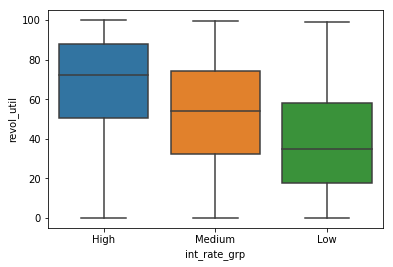

In [1030]:
#Boxplot between interest rate group and revol util

sns.boxplot(x='int_rate_grp',y='revol_util',data=loan_data_sample)
plt.show()

In [1031]:
#New dataframe curr is created with just 2 columns - installment and funded amount

curr = loan_data_sample[["installment", "funded_amnt"]]
curr.head()

,installment,funded_amnt
1,59.83,2500
8,152.39,5600
9,121.45,5375
12,305.38,9000
14,325.74,10000


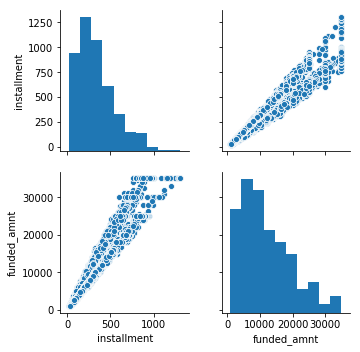

In [1032]:
#Pair plot between installment and loan fund amount
sns.pairplot(curr)
plt.show()

In [1033]:
#Finding correlation between loan fund amount and installment
cor = curr.corr()
round(cor, 3)

,installment,funded_amnt
installment,1.000,0.954
funded_amnt,0.954,1.000


We observe that installment and funded amount for loan is highly correlated with value 0.95.
Hene, when loan fund amount increase, installment value also increases.

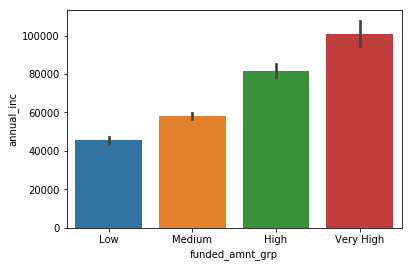

In [1034]:
#Bar plot between funded amount and annual income

sns.barplot(x='funded_amnt_grp', y='annual_inc', data=loan_data_sample)
plt.show()

Borrowers with very high annual income are most likely to get more loan fund amount and are likely to default.
<br> consumer finance company should consider to lend lower loan fund amount to higher sectors of annual income.

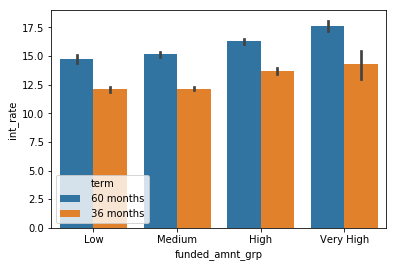

In [1035]:
#Bar plot between funded amount group and interest rate for each term
sns.barplot(x='funded_amnt_grp', y='int_rate',hue='term', data=loan_data_sample)
plt.show()

We observe that the borrower's who are funded VERY HIGH, pay higher rate of interest when the tenure is more. 
<br> consumer finance company have consider to lower the interest rate for borrowers opting for higher tenure loans. 

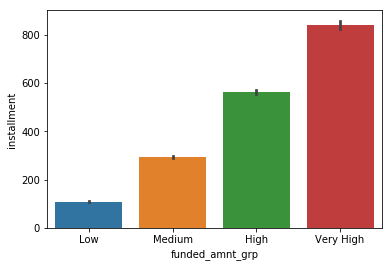

In [1036]:
#Bar plot funded amount group and installment
sns.barplot(x='funded_amnt_grp', y='installment', data=loan_data_sample)
plt.show()

Borrowers falling in VERY HIGH funded amount group are paying higher installments. Hence, they are most likely to default.
<br> consumer finance company have to either lower the installment amount or increase the number of installments for these sectors.

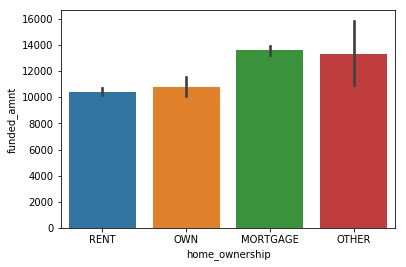

In [1037]:
#Bar plot between home ownership and funded amount

sns.barplot(x='home_ownership', y='funded_amnt',data=loan_data_sample)
plt.show() 

We observe that borrower's with MORTGAGE and RENTED home ownership are given considerably higher funded amount. 
<br> To prevent defauters, consumer finance company should consider providing lower fund amount to MORTGAGE and RENTED home ownership as bank does not have any leverage in this case if defaulted. 

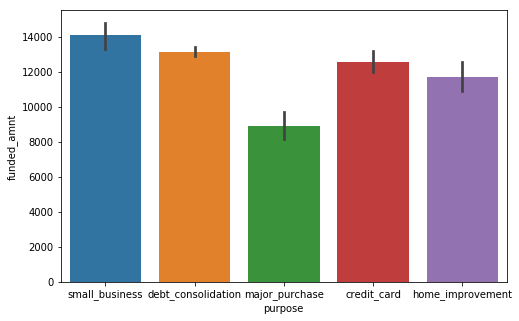

In [1043]:
#Bar plot between purpose and funded amount
plt.figure(figsize=[8, 5])
sns.barplot(x='purpose', y='funded_amnt',data=loan_main_purpose)
plt.show() 

We observe that small business sectors are sanction with higher fund amount and are likely to default compared to other purpose/sectors.
<br> consumer finance company should consider to lend the amount to small business sectors more carefully. 

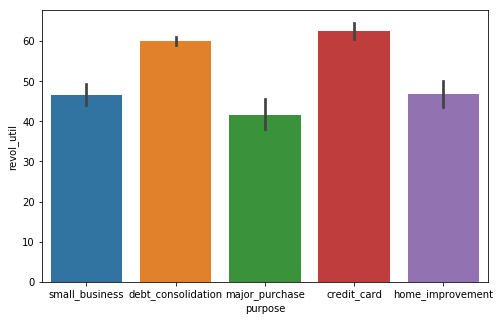

In [1042]:
#Bar plot between Purpose and revol util
plt.figure(figsize=[8, 5])
sns.barplot(x='purpose', y='revol_util',data=loan_main_purpose)
plt.show() 

This plot reveals that the revolving utilization factor is higher for credit card loans.
Conventionally, the revolving utilization factor has to be lower for better repayments.

<br> In this case, consumer finance company have to consider to decrease the exposure to credit card loans.